<a href="https://colab.research.google.com/github/Sonia-devi/FINAL_RESEARCH_PROJECT/blob/main/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel(r"/content/transformed dataset 1 1 1 2 1 1.xlsx")


In [3]:
df.head()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.0,1.0,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.0,1.0,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.0,4.0,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.0,4.0,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.0,2.0,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age Group                          295 non-null    int64  
 1   Handedness                         295 non-null    int64  
 2   Gender                             295 non-null    int64  
 3   Job Function                       295 non-null    int64  
 4   Weight                             291 non-null    float64
 5   Height                             289 non-null    float64
 6   BMI                                287 non-null    float64
 7   Aviation Sector                    291 non-null    float64
 8   Flight Hours                       166 non-null    float64
 9   Flight Type                        205 non-null    float64
 10  Bed Time                           294 non-null    float64
 11  Sleep Latency                      294 non-null    float64

In [5]:
df.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,NaN,NaN,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,NaN,NaN,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,NaN,NaN,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,NaN,NaN,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,NaN,NaN,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [6]:
df.shape

(295, 28)

In [7]:
#finding the duplicate values
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

if initial_rows == final_rows:
  print("No Duplicate Values Found.")
else:
  print("Duplicate Values Found and Dropped")

#Handle missing values, if any
if df.isnull().sum().sum() == 0:
  print("No Missing Values Found.")
else:
  print("Missing Values Found and Handled.")

No Duplicate Values Found.
Missing Values Found and Handled.


In [8]:
#Due to missing values (NaN), I performed "Imputation" which enabled me to fill in missing values with estimated values and I did this due to the size of my dataset, because if I had dropped the columns with Null (NaN) values it would reduce my dataset drastically.

df_2= df.fillna(df.mean())

df_2

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.000000,1.000000,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.000000,1.000000,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.000000,4.000000,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.000000,4.000000,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.000000,2.000000,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2


In [9]:
# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')


In [10]:
df_2.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,7755.638554,2.263415,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [11]:
df_2.describe() #(calculating some statistical data like percentile, mean and std of the numerical values )

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,1.884746,0.894915,0.233898,2.423729,81.473952,1.763744,26.151228,1.439863,7755.638554,2.263415,...,0.220339,0.294915,0.386441,0.795222,0.649660,0.552542,0.955631,0.299320,1.755932,1.674576
std,1.121954,0.394444,0.431975,1.812686,16.806353,0.088335,4.826239,0.811687,3961.099000,1.039649,...,0.635348,0.776663,0.773599,1.087519,0.974007,0.923863,1.178641,0.694144,1.027558,0.734845
min,0.000000,0.000000,0.000000,1.000000,52.000000,1.500000,17.577069,1.000000,56.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,71.000000,1.700000,23.315049,1.000000,6050.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,80.000000,1.780000,25.816630,1.000000,7755.638554,2.263415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,1.000000,0.000000,4.000000,90.000000,1.830000,27.755102,2.000000,8000.000000,2.263415,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,2.000000
max,5.000000,2.000000,2.000000,6.000000,190.000000,2.000000,65.743945,5.000000,22000.000000,6.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [12]:
df_2.sample(frac=0.5) # (get a subset of random rows or columns)

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
7,2,2,0,1,78.000000,1.760000,25.180785,1.0,14500.000000,4.000000,...,0,0,0,0.0,0.0,0,0.0,0.0,2,2
92,2,1,0,1,99.000000,1.800000,30.555556,1.0,5000.000000,2.000000,...,0,0,0,0.0,0.0,0,3.0,0.0,2,2
155,3,1,0,1,81.473952,1.730000,26.151228,1.0,15385.000000,1.000000,...,0,0,0,0.0,3.0,0,0.0,0.0,2,2
203,2,1,0,5,85.000000,1.750000,27.755102,4.0,7755.638554,2.263415,...,0,0,0,0.0,0.0,0,2.0,0.0,2,1
62,2,2,2,1,85.000000,1.850000,24.835646,1.0,8000.000000,2.000000,...,0,0,0,3.0,3.0,0,0.0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2,1,0,2,85.000000,1.850000,24.835646,2.0,7755.638554,1.000000,...,0,0,0,1.0,0.0,0,3.0,0.0,3,2
59,3,1,0,1,85.000000,1.763744,26.151228,1.0,10000.000000,2.000000,...,0,0,0,1.0,0.0,0,0.0,0.0,0,2
205,1,0,0,4,95.000000,1.850000,27.757487,2.0,7755.638554,2.263415,...,0,0,0,3.0,0.0,1,2.0,0.0,1,0
224,2,1,0,2,88.000000,1.850000,25.712199,2.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,0,0.0,0.0,1,2


In [13]:
sample_data = df_2.sample(frac=0.05)

In [14]:
sample_data.describe()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.866667,0.933333,0.266667,2.400000,85.40000,1.816000,25.564534,1.466667,8188.922088,2.403577,...,0.0,0.333333,0.800000,0.533333,0.666667,0.266667,1.333333,0.066667,1.600000,1.733333
std,0.990430,0.593617,0.593617,1.919821,20.65983,0.104047,3.491920,0.833809,5919.416608,0.957468,...,0.0,0.816497,1.207122,1.060099,1.234427,0.798809,1.290994,0.258199,0.828079,0.798809
min,0.000000,0.000000,0.000000,1.000000,61.00000,1.600000,21.222808,1.000000,100.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000,73.50000,1.765000,23.907498,1.000000,5127.819277,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,84.00000,1.830000,24.835646,1.000000,7755.638554,2.263415,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000
75%,2.000000,1.000000,0.000000,3.500000,87.00000,1.865000,26.653184,2.000000,9000.000000,2.631707,...,0.0,0.000000,1.000000,0.500000,0.500000,0.000000,2.500000,0.000000,2.000000,2.000000
max,4.000000,2.000000,2.000000,6.000000,130.00000,2.000000,33.159882,4.000000,22000.000000,4.000000,...,0.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000


In [15]:
# Define the feature columns (X) excluding the target variable ('Sleep Quality')
feature_columns = [ 'Job Function', 'BMI',
                    'Bed Time', 'Sleep Latency', 'Sleep Duration',
                    'Sleep Inability', 'WASO Problems',  'Breathing Difficulties',
                    'Cold difficulties',  'Bad dreams', 'Pain difficulties']


In [16]:
# Create the feature DataFrame (X)
X = df_2[feature_columns]
# Create the target variable Series (y)
y = df_2['Sleep Quality']


FEATURE NORMALIZATION

In [17]:
#Feature normalization
columns_to_normalize = ['BMI']  # coloumns I want to normalize

In [18]:
# Min-Max Scaling
X_minmax_scaled = (X - X.min()) / (X.max() - X.min())

In [19]:
# Standardization (Z-score normalization)
X_standardized = (X - X.mean()) / X.std()

In [20]:
# Display the min-max scaled data
print("\nMin-Max Scaled Data:\n", X_minmax_scaled)


Min-Max Scaled Data:
      Job Function       BMI  Bed Time  Sleep Latency  Sleep Duration  \
0             0.0  0.260564     0.125       0.285714             0.8   
1             0.0  0.176977     0.250       0.000000             0.6   
2             0.0  0.050303     0.125       0.285714             0.8   
3             0.0  0.177412     0.375       0.142857             0.6   
4             0.0  0.218258     0.000       0.000000             0.6   
..            ...       ...       ...            ...             ...   
290           0.8  0.251852     0.500       0.857143             0.6   
291           0.4  0.087130     0.500       0.714286             0.8   
292           0.2  0.210181     0.375       0.142857             0.8   
293           0.4  0.171063     0.375       0.285714             0.8   
294           0.4  0.224811     0.375       0.000000             0.6   

     Sleep Inability  WASO Problems  Breathing Difficulties  \
0           1.000000       1.000000              

In [21]:
# Display the standardized data
print("\nStandardized Data:\n", X_standardized)


Standardized Data:
      Job Function       BMI  Bed Time  Sleep Latency  Sleep Duration  \
0       -0.785425  0.823907 -1.163325       0.073160        0.753303   
1       -0.785425 -0.010303 -0.393015      -1.121784       -0.234361   
2       -0.785425 -1.274539 -1.163325       0.073160        0.753303   
3       -0.785425 -0.005963  0.377294      -0.524312       -0.234361   
4       -0.785425  0.401692 -1.933634      -1.121784       -0.234361   
..            ...       ...       ...            ...             ...   
290      1.421245  0.736968  1.147604       2.463048       -0.234361   
291      0.317910 -0.906997  1.147604       1.865576        0.753303   
292     -0.233757  0.321079  0.377294      -0.524312        0.753303   
293      0.317910 -0.069329  0.377294       0.073160        0.753303   
294      0.317910  0.467088  0.377294      -1.121784       -0.234361   

     Sleep Inability  WASO Problems  Breathing Difficulties  \
0           1.405999       1.195679               -

visualisation of dataset

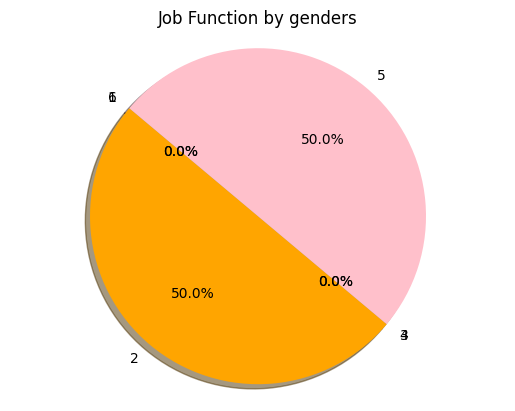

In [23]:
from matplotlib import pyplot as plt
job_functions = [1,2,3,4,5,6 ]
genders = [0,1,0,0,1,0]
colors = ['yellow', 'orange', 'lightblue', 'lightgreen','pink', 'blue']

plt.pie(genders, labels=job_functions, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Add a title
plt.title('Job Function by genders')

# Display the pie chart
plt.show()

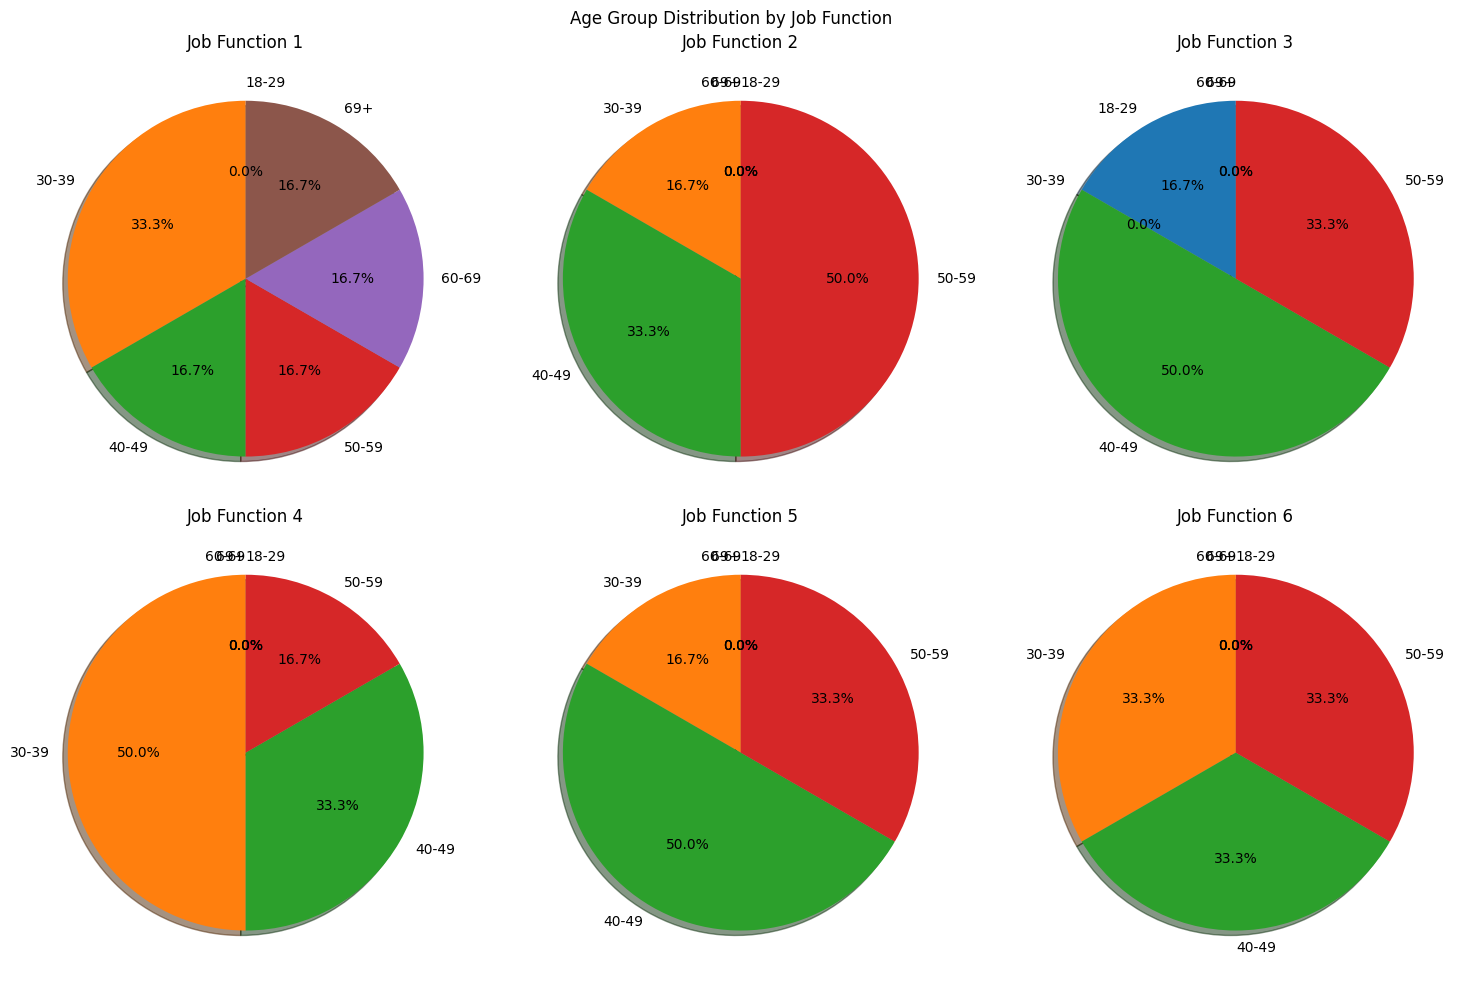

In [24]:

# Sample data
job_functions = [1, 2, 3, 4, 5, 6]  #  job function categories (integers)
age_groups = {
    1: [1, 2, 4, 3, 1, 5],  # age groups for each job function
    2: [1, 3, 2, 2, 3, 3],
    3: [0, 2, 2, 3, 2, 3],
    4: [1, 3, 2, 2, 1, 1],
    5: [1, 2, 2, 3, 2, 3],
    6: [1, 2, 3, 2, 1, 3]
}

# Categorize age groups into bins or ranges
age_bins = ['18-29', '30-39', '40-49', '50-59', '60-69', '69+']
age_categories = {}
for job_function, ages in age_groups.items():
    age_categories[job_function] = []
    for age in ages:
        if age == 5:
            age_categories[job_function].append('69+')
        elif age == 4:
            age_categories[job_function].append('60-69')
        elif age == 3:
            age_categories[job_function].append('50-59')
        elif age == 2:
            age_categories[job_function].append('40-49')
        elif age == 1:
            age_categories[job_function].append('30-39')
        else:
            age_categories[job_function].append('18-29')

# Count the number of occurrences of each age group category for each job function
age_counts = {job_function: [age_categories[job_function].count(category) for category in age_bins] for job_function in job_functions}

# Create the pie charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Age Group Distribution by Job Function')

for i, job_function in enumerate(job_functions):
    row = i // 3
    col = i % 3


    axes[row, col].pie(age_counts[job_function], labels=age_bins, autopct='%1.1f%%', startangle=90, shadow=True)
    axes[row, col].set_title(f'Job Function {job_function}')

plt.tight_layout()
plt.show()



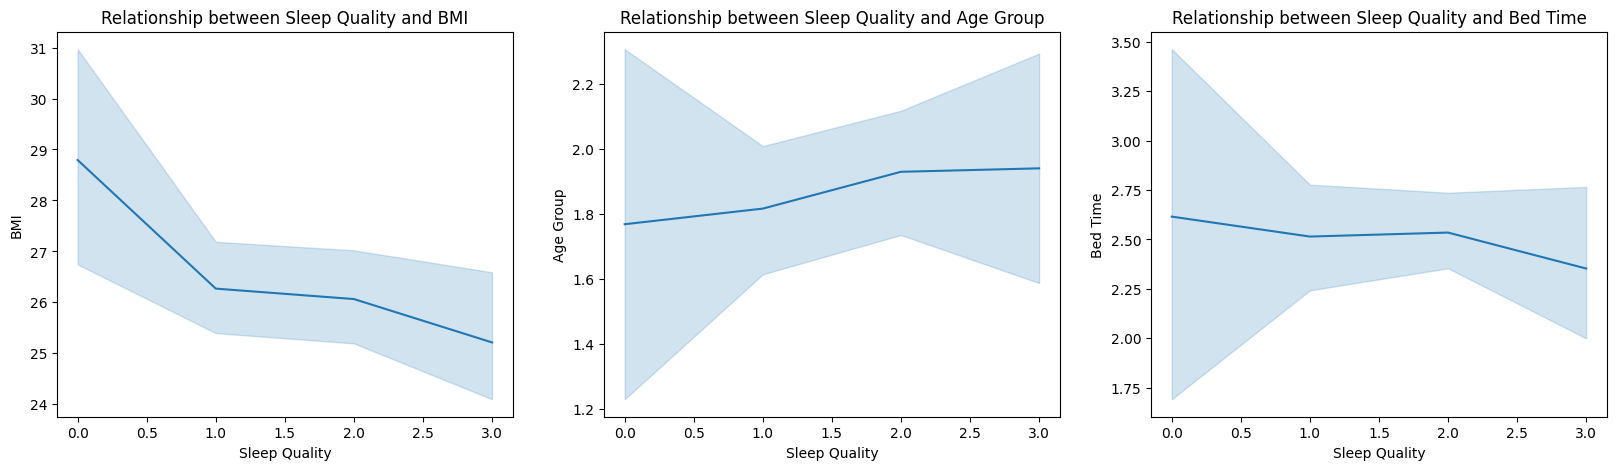

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataset loaded into a DataFrame named 'df'

# Define the order of 'Sleep Quality' for proper plotting
sleep_quality_order = [0, 1, 2, 3]

# Set the 'Sleep Quality' column as a categorical variable with the specified order
df['Sleep Quality'] = pd.Categorical(df['Sleep Quality'], categories=sleep_quality_order, ordered=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the line plots with the specified order
sns.lineplot(ax=axes[0], x='Sleep Quality', y='BMI', data=df)
sns.lineplot(ax=axes[1], x='Sleep Quality', y='Age Group', data=df)
sns.lineplot(ax=axes[2], x='Sleep Quality', y='Bed Time', data=df)

axes[0].set_title('Relationship between Sleep Quality and BMI')
axes[1].set_title('Relationship between Sleep Quality and Age Group')
axes[2].set_title('Relationship between Sleep Quality and Bed Time')

plt.show()


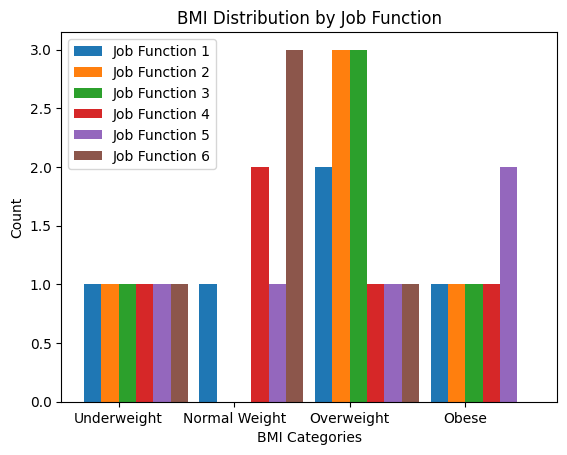

In [26]:
# Sample data
job_functions = [1, 2, 3, 4, 5, 6]  # job function categories (integers)
bmi_values = {
    1: [30.12759924, 26.10150234, 20, 26.12244898],
    2: [26.6727633, 26.36560303, 25.71219869, 32.54800084],
    3: [25.14741589, 26.84061047, 27.04164413, 30.66890496],
    4: [23.32341806, 24.85836513, 33.24083709, 26.26494385],
    5: [23.87543253, 33.15988164, 25.71219869, 45.76442368],
    6: [22.49858277, 19.56823633, 22.03856749, 25.95155709]
}

# Categorize BMI values into bins
bmi_bins = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
bmi_categories = {}
for job_function, values in bmi_values.items():
    bmi_categories[job_function] = []
    for bmi in values:
        if bmi < 18.0:
            bmi_categories[job_function].append('Underweight')
        elif 18.0 <= bmi < 25.0:
            bmi_categories[job_function].append('Normal Weight')
        elif 25.0 <= bmi < 30.0:
            bmi_categories[job_function].append('Overweight')
        else:
            bmi_categories[job_function].append('Obese')

    # Check if the 'Underweight' category is missing and add it with a count of 0
    if 'Underweight' not in bmi_categories[job_function]:
        bmi_categories[job_function].append('Underweight')

# Count the number of occurrences of each BMI category for each job function
bmi_counts = {job_function: [bmi_categories[job_function].count(category) for category in bmi_bins] for job_function in job_functions}

# Create the bar graphs
width = 0.15
x = range(len(bmi_bins))
num_job_functions = len(job_functions)
color_map = plt.get_cmap('tab10')  # Use tab10 color map for more than 6 job functions

fig, ax = plt.subplots()

for i, job_function in enumerate(job_functions):
    color = color_map(i % num_job_functions)  # Get the color based on the job function index
    ax.bar([pos + i * width for pos in x], bmi_counts[job_function], width=width, label=f'Job Function {job_function}', color=color)

ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(bmi_bins)
ax.set_xlabel('BMI Categories')
ax.set_ylabel('Count')
ax.set_title('BMI Distribution by Job Function')
ax.legend()

plt.show()




FEATURE SELECTION

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create an instance of SelectKBest with the desired number of features to keep
num_features_to_keep = 8  # Adjust this value as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_keep)

# Apply feature selection to your scaled or standardized data
X_selected = selector.fit_transform(X_standardized, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Extract the names of the selected features
selected_feature_names = [feature_columns[i] for i in selected_feature_indices]

In [29]:
# Print the names of the selected features
print("Selected Features:", selected_feature_names)

Selected Features: ['BMI', 'Sleep Latency', 'Sleep Duration', 'Sleep Inability', 'WASO Problems', 'Breathing Difficulties', 'Bad dreams', 'Pain difficulties']


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=230)

SVM CLASSIFIER

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an instance of the SVM classifier
svm = SVC(kernel="linear", gamma=0.06, C=0.3,random_state=230,degree=5)


In [32]:
# Perform cross-validation and obtain accuracy scores
scores = cross_val_score(svm, X_train, y_train, cv=6)  # Change cv to the desired number of folds

In [33]:
# Print the results
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.06


In [34]:
svm.fit(X_train,y_train)

SVC(C=0.3, degree=5, gamma=0.06, kernel='linear', random_state=230)

In [35]:
y_pred = svm.predict(X_test)

In [36]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy:.2f}')

Accuracy of SVM: 0.72


RANDOM FOREST

In [37]:
# Fit and transform the imputer on the training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=230)

In [39]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['auto', 'sqrt', 'log2']
    }


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=230),
             n_jobs=-1,
             param_grid={'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [100, 200, 300, 500]})

In [41]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# Hyperparameters
criterion = 'entropy'  # Criterion for splitting ('gini' or 'entropy')
max_depth = None     # Maximum depth of the tree
min_samples_split = 5  # Minimum number of samples required to split an internal node
min_samples_leaf = 2   # Minimum number of samples required to be at a leaf node

# Create the Decision Tree classifier with the specified hyperparameters
dectree = DecisionTreeClassifier(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=230
)
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
num_folds =40

# Define the cross-validation method (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=230)

# Perform cross-validation and get the scores for each fold
scores = cross_val_score(dectree, X_train, y_train, cv=kfold)

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
dectree.fit(X_train, y_train)


Scores for each fold: [0.66666667 0.33333333 0.33333333 0.5        0.33333333 0.
 0.5        0.33333333 0.5        0.83333333 0.5        0.33333333
 0.66666667 0.16666667 0.66666667 0.33333333 0.5        0.5
 0.66666667 0.33333333 0.33333333 0.4        0.2        0.6
 0.4        0.8        0.2        0.4        0.2        0.2
 0.8        0.6        0.8        0.2        0.2        0.2
 0.4        0.4        0.4        0.4       ]
Mean score: 0.42833333333333334


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, random_state=230)

In [42]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.5835353535353536


In [43]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
# Hyperparameters
n_estimators = 500     # Number of decision trees in the forest
criterion = 'entropy'  # Criterion for splitting ('gini' or 'entropy')
max_depth = None     # Maximum depth of the trees
min_samples_split = 5  # Minimum number of samples required to split an internal node
min_samples_leaf = 2  # Minimum number of samples required to be at a leaf node
random_state = 230     # Random seed for reproducibility

# Create the Random Forest classifier with the specified hyperparameters
ranfor = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
num_folds = 50

# Define the cross-validation method (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=230)

# Perform cross-validation and get the scores for each fold
scores = cross_val_score(ranfor, X_train, y_train, cv=kfold)

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
ranfor.fit(X_train, y_train)

Scores for each fold: [0.8  0.4  0.8  0.4  0.4  0.6  0.2  0.8  0.8  0.8  0.4  0.8  0.8  0.4
 0.8  0.6  0.2  0.4  0.8  0.4  0.6  0.75 1.   0.5  0.5  0.5  0.25 0.5
 1.   0.75 0.75 0.75 0.25 0.5  0.5  0.25 0.5  0.75 0.75 0.25 1.   0.5
 0.5  0.5  1.   0.25 0.75 0.25 0.75 0.75]
Mean score: 0.5890000000000001


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=230)

In [44]:
# Making predictions on test dataset
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)


In [45]:
# Evaluating using accuracy_score metric
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)


In [46]:
print("Disicion Tree: " + str(accuracy_ranfor * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Disicion Tree: 60.810810810810814
Random Forest: 60.810810810810814


Artificial neural network

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping

In [48]:
num_classes = max(y_train) + 1  # Number of classes in your dataset (4 in this case)

In [49]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass

In [50]:
# Compile the model with categorical_crossentropy loss and 'adam' optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
from keras.utils import to_categorical

# One-hot encode the target variable
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)


In [52]:
from keras.callbacks import EarlyStopping
import numpy as np
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=20, validation_split=0.3, callbacks=[early_stop], verbose=1)


Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 1.9011 - accuracy: 0.2143 - val_loss: 1.2339 - val_accuracy: 0.3433
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 1.2669 - accuracy: 0.4870 - val_loss: 1.2230 - val_accuracy: 0.5224
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 1.2524 - accuracy: 0.4091 - val_loss: 1.1991 - val_accuracy: 0.4478
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 1.1311 - accuracy: 0.5000 - val_loss: 1.0666 - val_accuracy: 0.5821
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0687 - accuracy: 0.5584 - val_loss: 1.0453 - val_accuracy: 0.5672
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0609 - accuracy: 0.5325 - val_loss: 1.0626 - val_accuracy: 0.5224
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0227 - accuracy: 0.5649 - val_loss: 0.9952 - val_accuracy: 0.6119
Epoch 8/100
8/8 [=========

In [53]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=-1)  # Convert probabilities to class labels



3/3 [==============================] - 0s 4ms/step


In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ANN: {accuracy:.2f}')


Accuracy of ANN: 0.68


RESEMBLE METHODS

In [65]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Create instances of the classifiers
svm = SVC(kernel="linear", gamma=0.03, C=0.3, random_state=230)
random_forest = RandomForestClassifier(n_estimators=500, random_state=230)
ann = MLPClassifier(hidden_layer_sizes=(100, 60), activation='relu', random_state=230)

# Perform cross-validation and obtain accuracy scores
svm_scores = cross_val_score(svm, X_train, y_train, cv=6)  # Change cv to the desired number of folds
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=6)  # Change cv to the desired number of folds
ann_scores = cross_val_score(ann, X_train, y_train, cv=6)  # Change cv to the desired number of folds




In [66]:
# Print the results
print("Support Vector Machine Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (svm_scores.mean(), svm_scores.std()))

print("Random Forest Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (rf_scores.mean(), rf_scores.std()))

print("Artificial Neural Network Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (ann_scores.mean(), ann_scores.std()))

Support Vector Machine Classifier:
0.64 accuracy with a standard deviation of 0.06
Random Forest Classifier:
0.60 accuracy with a standard deviation of 0.06
Artificial Neural Network Classifier:
0.52 accuracy with a standard deviation of 0.07
